# Assignment 1

**About the Data:** <br>
The data consists of `5000` tweets collected on `'Global Warming'`. In this exercise, we perform `Topic modeling` on the tweets text and interpret the topics. This can be done by analysing the distribution of words in the topics. Thus we assign a `'Theme'` to each topic. <br>

 - Download the dataset `global_warming_tweets.csv` from eleran 
 - Basic cleaning and text processing is required to be done<br>
 - You might refine the cleaning steps based on the first round of Topic analysis to improve further<br>
 - Submit the notebook with all output cells printed. You can specifically add answers/explanations/comments in the markdown cells provided. Create additional code/markdown cells as may be required. Submit to the`Assignment1 dropbox`.
 - **Note**: Partial codes are given. In some places the partial codes are commented, uncomment to use them. You are free to perform the same task using a different method/code.
 

**Marks allocation -**

 - Assignment questions carry 10 points in total(10% of final grade)
 - There are **8** questions to answer. Each carries 1 mark, except for **Q2** which carries **2 marks**
 - 1 bonus point is rewarded based on -<br>
    - Additional text processing steps added if any
    - Interpretation of analysis
    - Interpretation of topics and research done for the same
    
**Grading -** <br>
The assignment will be graded based  on the notebook that you submit with results and answers. Note that there is no one unique answer for some questions E.g Q7,Q8. The answers may vary depending on the text processing done. It may also be due to some randomness in the topic modeling API.

## Topic Modeling

In [1]:
import pandas as pd
import numpy as np

import nltk

import gensim
from gensim.models import LdaModel
from gensim.corpora import Dictionary


from sklearn.feature_extraction.text import CountVectorizer


**Read the data and check basic properties**

Tasks:
1. Read the data from global_warming_tweets.csv
2. Check the first few rows of the data. Use pandas head and values function to see the full tweets string
3. Verify the number of observations in the dataset 

In [2]:
data = pd.read_csv('global_warming_tweets.csv')

In [3]:
print(data.head(10))
data.shape #5000 number of observations

                                               tweet
0  global warming for kids http://bit.ly/a8WW1I  ...
1  Brilliant Tips For Valentine's Day : A Screami...
2  MSNBC's Ratigan Blames 'Snowpocalypse' on Glob...
3  Nice. RT @Cubachi: Governor Christie will cut ...
4  India to have own panel on climate change: Jai...
5  Geologists Study Historic Patterns of Climate ...
6  India Ditches UN Climate Change Group http://b...
7  Interesting RT @WarrenWhitlock: Did all this i...
8  D.C. Snowstorm: How Global Warming Makes Blizz...
9    @sensible Tornados, Global warming, hurricanes.


(5000, 1)

In [4]:
data.values

array([['global warming for kids http://bit.ly/a8WW1I  what is global warming for kids?'],
       ["Brilliant Tips For Valentine's Day : A Screaming •À_O•À_: ... Climate Change, clinical trials collagen, clinique, clip... http://bit.ly/d8RLpT"],
       ["MSNBC's Ratigan Blames 'Snowpocalypse' on Global Warming http://bit.ly/biy5fZ"],
       ...,
       ['Ice-covered volcanoes may answer climate change questions - latimes.com http://shar.es/mucwb #volcanoes #climatechange'],
       ['India to have own panel on climate change: Jairam Ramesh: http://ping.fm/q9FjK'],
       ['State climate bill: Efficiency will count toward renewable mandate: A scaled-back global warming bill would enable... http://bit.ly/9DusAa']],
      dtype=object)

### Text preprocessing

<font color = 'blue'>Drop duplicate tweets:</font>

**Q1. We see there are duplicate tweets in the data. Find the number of duplicate tweets using pandas functions. Then use pandas drop_duplicates() to drop them(drop except for the first occurence).**

In [5]:
## Your code here. Print the number of duplicate tweets ##

data.duplicated().sum()



404

In [6]:
## Your code here. Drop the duplicates and print the number of rows in data now ##


data.loc[data.duplicated(keep='first'),:]

,tweet
142,"Higher temperature, sea level due to global wa..."
254,Global Warming Dent's El Ni'o's Protective Shi...
292,"So it*s April 27th, Phoenix has 90•_Á weather ..."
398,@WordtotheBrides Just read your blog! And 1) A...
503,@SooperMexican Global warming. Clearly.
...,...
4966,Why cleaner air could speed global warming [link]
4970,Treating Climate Change as a Curable Disease: ...
4981,"Al Gore preached his climate change, he wanted..."
4988,RT @Newsweek: Climate Change: Places To See Be...


In [7]:
data.drop_duplicates(keep='first').shape


(4596, 1)

<font color = blue>**Q1 Answers:**</font> <br>
Enter the number of duplicate tweets here -

- 404



**Q2. Create Preprocessing functions** <br>
#### Remove @mention, URLs, and stop words

In [8]:
import re
import string
from nltk.corpus import stopwords

Tasks: <Br>
**Create stop words list** <br>

Use the nltk english stop words. Also add the characters from `string.punctuation` to your stop word list. We see words `link` and `rt` occuring frequently, also add them to stop list.<br>
<br>
`Note:` We may have to treat more words as stop words(words to be excluded from our data), after reviewing the first set of Topic modeling results. You could choose to update the same stop list variable later or create a copy of the list and update the copy to be used to clean the data further and find refined topics in the second or third round of analysis.<br>

**Define a text processing function whose -** <br>
Input - List of raw tweets <br>
Output - List of processed tweets<br>

The function must do the following:
 - convert all tweets to lower case
 - remove @mentions
 - remove www and http URLs
 - tokenize with nltk.word_tokenize
 - remove all stop words
 - lemmatize with nltk WordNetLemmatizer

**Create stop words list** <br>
<font color = blue>**Q2 Answers:**</font> <br>
Use the below code cells-

In [34]:
## Your code here for Q2 - stop words list ##

from nltk.corpus import stopwords
import string
stop_list = stopwords.words('english') + [char for char in string.punctuation] + ['link','rt'] + ['dc','al','via','tcot','•à_o•à_', '...', '..',"''", '``','//','--',"'s","'d","'ll","'m","in..","à","•à_","de","ca","o..","btw"]

#for question 6 refining
#add + ['dc','al','via','tcot','•à_o•à_', '...', '..',"''", '``','//','--',"'s","'d","'ll","'m","in..","à","•à_","de","ca","o..","btw"] for second round
#print([char for char in string.punctuation])
print(stop_list)



['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

**Define a text processing function with-** <br>
Input - List of raw tweets <br>
Output - List of processed tweets. Save the processed tweets in a list named `processed_tweets` <br>
<font color = blue>**Q2 Answers:**</font> <br>
Use the below code cells -

In [35]:
## Your code - create tokenizer/lemmatizer objects ##
from nltk.tokenize import word_tokenize
 

#create lemmatizer
wnl = nltk.stem.wordnet.WordNetLemmatizer()

def remove_urls(s):
    return re.sub(r'https?://\S+', "", s) #replace with empty 

def remove_www(s):
    return re.sub(r'www?.\S+',"",s)

def remove_mentions(s):
    return re.sub(r'@\S+',"",s)



In [36]:

listtweets=data.drop_duplicates(keep='first').values.tolist()
print(listtweets)
print(type(listtweets))

[['global warming for kids http://bit.ly/a8WW1I  what is global warming for kids?'], ["Brilliant Tips For Valentine's Day : A Screaming •À_O•À_: ... Climate Change, clinical trials collagen, clinique, clip... http://bit.ly/d8RLpT"], ["MSNBC's Ratigan Blames 'Snowpocalypse' on Global Warming http://bit.ly/biy5fZ"], ["Nice. RT @Cubachi: Governor Christie will cut all $65 million from NJ's global warming fund http://is.gd/brylO"], ['India to have own panel on climate change: Jairam Ramesh - India - The Times of India http://retwt.me/1LShz (via @news_in)'], ['Geologists Study Historic Patterns of Climate Change: University of Cincinnati geologist Tom Lowell is part of a t... http://bit.ly/cqO8E5'], ['India Ditches UN Climate Change Group http://bit.ly/aoccoR'], ['Interesting RT @WarrenWhitlock: Did all this ice come from global warming? http://su.pr/2TZBGv'], ["D.C. Snowstorm: How Global Warming Makes Blizzards Worse|There's scarcely any powder in Vancouver, while .. http://oohja.com/x6K1K

In [12]:
## Your code . Define text processing function ##
def listToString(s):  
     
    str1 = " " 
    
    # return string   
    return (str1.join(s))
def process_alltweets(listtweets):
    processed_tweets = []
    tweet_tokens = []
    for tweet in listtweets:
        tweet = listToString(tweet)
        tweet = tweet.lower()
        tweet = remove_urls(tweet)
        tweet = remove_www(tweet)
        tweet = remove_mentions(tweet)
        tweet_tokens = word_tokenize(tweet)
        tweet_tokens = [token for token in tweet_tokens if token not in stop_list]
        tweet_tokens = [wnl.lemmatize(token) for token in tweet_tokens] 
#         print(tweet_tokens)
        tweet_tokens = [token for token in tweet_tokens if len(token) > 1]
        processed_tweets.append(" ".join(tweet_tokens))
    
    return processed_tweets
print(process_alltweets(listtweets))

['global warming kid global warming kid', "brilliant tip valentine 's day screaming •à_o•à_ ... climate change clinical trial collagen clinique clip ...", "msnbc 's ratigan blame 'snowpocalypse global warming", "nice governor christie cut 65 million nj 's global warming fund", 'india panel climate change jairam ramesh india time india via', 'geologist study historic pattern climate change university cincinnati geologist tom lowell part ...', 'india ditch un climate change group', 'interesting ice come global warming', "d.c. snowstorm global warming make blizzard worse|there 's scarcely powder vancouver ..", 'tornado global warming hurricane', 'climate service new federal climate change agency forming via', 'climate change place see disappear•à_the america photo', '30 inch snow washington al gore blame global warming', 'video contest mentioned climate change ning-built exchange connect gov20la', 'webb tout global warming department|little rock arkansas lawmaker authored legislation crea

**Q3: What are the top 20 most frequent words in the corpus. Print the list of words.**
### Frequency distribution of words
Tasks: <br>

 - Create a CountVectorizer object, call the fit_transform() function with input parameter as processed_tweets.
 - Save the vocabulary in the variable `vocab`
 - Call the toarray() on the sparse vector and save the resulting matrix/array in the variable `cv_matrix`
 - Create a pandas DataFrame named `vect_df` using `cv_matrix` and `vocab`
 - Apply the sum() on the above DF to create a pandas series with word/feature counts(series contains frequency of each word in the courpus)
 - Inspect the values in the series variable and find the top 20 most frequent words
 
 **Note:** The above steps serve as a guideline, you may choose different functions or methods to answer the question


In [13]:
tweet_corpus = process_alltweets(listtweets)
print(tweet_corpus)

['global warming kid global warming kid', "brilliant tip valentine 's day screaming •à_o•à_ ... climate change clinical trial collagen clinique clip ...", "msnbc 's ratigan blame 'snowpocalypse global warming", "nice governor christie cut 65 million nj 's global warming fund", 'india panel climate change jairam ramesh india time india via', 'geologist study historic pattern climate change university cincinnati geologist tom lowell part ...', 'india ditch un climate change group', 'interesting ice come global warming', "d.c. snowstorm global warming make blizzard worse|there 's scarcely powder vancouver ..", 'tornado global warming hurricane', 'climate service new federal climate change agency forming via', 'climate change place see disappear•à_the america photo', '30 inch snow washington al gore blame global warming', 'video contest mentioned climate change ning-built exchange connect gov20la', 'webb tout global warming department|little rock arkansas lawmaker authored legislation crea

In [14]:
## Your code. Create vector object here ##

cv = CountVectorizer(tweet_corpus)
count_vect = cv.fit_transform(tweet_corpus)
print(type(count_vect))



<class 'scipy.sparse.csr.csr_matrix'>


In [15]:
## Your code. Save the vocabulary and result of toarray() here ##
vocab = cv.get_feature_names()

print("Number of features :\n", len(vocab))
cv_matrix = count_vect.toarray()
print(cv_matrix)
print(cv_matrix.shape)

Number of features :
 6900
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(4596, 6900)


In [16]:
##Your code. Create the dataframe

vect_df = pd.DataFrame(cv_matrix, columns=vocab)
print(vect_df[:3])

   00  000  00am  00pm  02  04  062  07  08  09  ...  à_global  à_green  à_if  \
0   0    0     0     0   0   0    0   0   0   0  ...         0        0     0   
1   0    0     0     0   0   0    0   0   0   0  ...         0        0     0   
2   0    0     0     0   0   0    0   0   0   0  ...         0        0     0   

   à_no  à_o  à_only  à_poisoning  à_s  à_t  à_the  
0     0    0       0            0    0    0      0  
1     0    1       0            0    0    0      0  
2     0    0       0            0    0    0      0  

[3 rows x 6900 columns]


In [17]:
##Your code. Get the word counts by applying sum()

vocab_s1=vect_df.sum(axis=0)
print(vocab_s1[:10])
print(type(vocab_s1))


00       4
000     13
00am     1
00pm     1
02       3
04       8
062      1
07       3
08       3
09       3
dtype: int64
<class 'pandas.core.series.Series'>


In [18]:
list(cv.vocabulary_.keys())[:10]

['global',
 'warming',
 'kid',
 'brilliant',
 'tip',
 'valentine',
 'day',
 'screaming',
 'à_o',
 'à_']

In [19]:

from sklearn.feature_extraction.text import CountVectorizer 
texts = tweet_corpus
vec = CountVectorizer().fit(texts)
bag_of_words = vec.transform(texts)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
sorted(words_freq, key = lambda x: x[1], reverse=True)


[('climate', 2834),
 ('change', 2579),
 ('global', 2412),
 ('warming', 2331),
 ('via', 422),
 ('new', 245),
 ('news', 213),
 ('snow', 202),
 ('bill', 185),
 ('tcot', 171),
 ('energy', 164),
 ('science', 157),
 ('green', 156),
 ('say', 149),
 ('scientist', 145),
 ('report', 139),
 ('people', 135),
 ('world', 129),
 ('earth', 128),
 ('obama', 128),
 ('day', 127),
 ('time', 115),
 ('dc', 115),
 ('un', 110),
 ('à_', 109),
 ('make', 103),
 ('could', 100),
 ('volcano', 96),
 ('get', 94),
 ('gore', 90),
 ('one', 88),
 ('think', 86),
 ('blizzard', 84),
 ('p2', 84),
 ('may', 84),
 ('weather', 83),
 ('conference', 83),
 ('fight', 82),
 ('senate', 82),
 ('cause', 82),
 ('al', 80),
 ('agency', 79),
 ('washington', 75),
 ('study', 74),
 ('great', 74),
 ('law', 73),
 ('help', 70),
 ('impact', 70),
 ('talk', 70),
 ('legislation', 69),
 ('winter', 69),
 ('com', 69),
 ('video', 68),
 ('state', 67),
 ('graham', 67),
 ('2010', 67),
 ('like', 66),
 ('cold', 65),
 ('stop', 65),
 ('effect', 65),
 ('mean', 6

<font color = blue>**Q3 Answer:**</font> <br>
The code cell below must print the top 20 words with frequency. Also copy the top 20 words and the word frequency output to the markdown cell that follows.

In [20]:
## Your code here ###
print(words_freq[:20])

[('global', 2412), ('warming', 2331), ('kid', 9), ('brilliant', 18), ('tip', 11), ('valentine', 7), ('day', 127), ('screaming', 31), ('à_o', 30), ('à_', 109), ('climate', 2834), ('change', 2579), ('clinical', 57), ('trial', 57), ('collagen', 44), ('clinique', 25), ('clip', 25), ('msnbc', 19), ('ratigan', 11), ('blame', 48)]


**Copy the top 20 words and it's frequency here. Note that this is the output in the first run before refining results :**

-('global', 2412), ('warming', 2331), ('kid', 9), ('brilliant', 18), ('tip', 11), ('valentine', 7), ('day', 127), ('screaming', 31), ('à_o', 30), ('à_', 109), ('climate', 2834), ('change', 2579), ('clinical', 57), ('trial', 57), ('collagen', 44), ('clinique', 25), ('clip', 25), ('msnbc', 19), ('ratigan', 11), ('blame', 48)

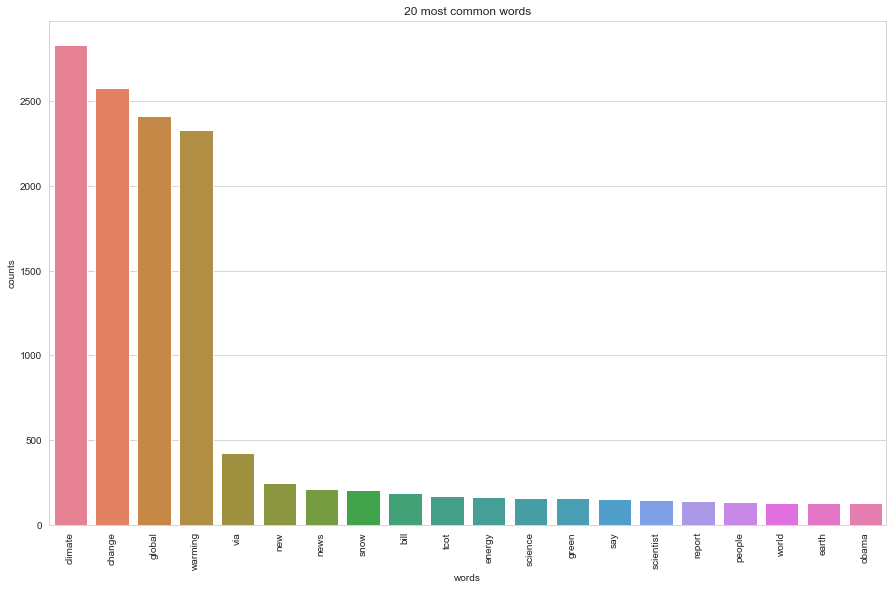

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

def plot_20_most_common_words(count_data, words):
    import matplotlib.pyplot as plt
    #words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='20 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
    
# Initialise the count vectorizer with the English stop words
count_vectorizer = vocab
# Fit and transform the processed titles
count_data = count_vect
# Visualise the 10 most common words
plot_20_most_common_words(count_data, count_vectorizer)


## Topic Modeling
**Hint:** Refer to the class Lab on Topic modeling to get help with these codes

In [37]:
#Note that gensim requires a list of tokens for finding the dictionary
from nltk.tokenize import word_tokenize

#Your code here to tokenize the processed tweets. ##
#second round codes
def expand1(s):
    return re.sub(r"n't",'not',s)
def expand2(s):
    return re.sub(r'nt','not',s)

def process_alltweets(listtweets):
    processed_tweets = []
    tweet_tokens = []
    for tweet in listtweets:
        tweet = listToString(tweet)
        tweet = tweet.lower()
        tweet = remove_urls(tweet)
        tweet = remove_www(tweet)
        tweet = remove_mentions(tweet)
        tweet = expand1(tweet)
        tweet = expand2(tweet)
        tweet_tokens = word_tokenize(tweet)
        tweet_tokens = [token for token in tweet_tokens if token not in stop_list]
        tweet_tokens = [wnl.lemmatize(token) for token in tweet_tokens] 
#         print(tweet_tokens)
        tweet_tokens = [token for token in tweet_tokens if len(token) > 1]
        processed_tweets.append(tweet_tokens)
    
    return processed_tweets
processed_tweets = process_alltweets(listtweets)

### **Create gensim dictionary**
<font color = red>Note: Do not confuse with the features and vector created from CountVectorizer to answer Q3. We will be creating a dictionary object and bag of words vector again with gensim to perform LDA. However, there are methods to reuse the sklearn objects with gensim, but this is not covered in our Labs.</font> 

In [38]:
#We have saved the tokenized preprocessed tweets in a list above. Let us use it here.

# Your code here to create a dictionary representation of the tweets. Each word gets an id ##

dictionary = gensim.corpora.Dictionary(processed_tweets)
print(dictionary)
print('Sample word to number mappings:', list(dictionary.items())[:15])
print('Total Vocabulary Size:', len(dictionary))


Dictionary(7425 unique tokens: ['global', 'kid', 'warming', 'brillianot', 'change']...)
Sample word to number mappings: [(0, 'global'), (1, 'kid'), (2, 'warming'), (3, 'brillianot'), (4, 'change'), (5, 'climate'), (6, 'clinical'), (7, 'clinique'), (8, 'clip'), (9, 'collagen'), (10, 'day'), (11, 'screaming'), (12, 'tip'), (13, 'trial'), (14, 'valenotine')]
Total Vocabulary Size: 7425


**Q4. Using the gensim dictionary filter_extremes(), filter words that occur in less than 5 tweets<br>
Which parameter would you set to achieve this?**

<font color = blue>**Q4 Answer:**</font> <br>
Use the code cell below to call the filter_extremes() function. Print the length of the resulting dictionary. Observe that there are fewer features now.

In [39]:
## Your code here ##

# Filter out words that occur in less than 5 documents.
dictionary.filter_extremes(no_below=5)

print('Total Vocabulary Size after filters:', len(dictionary))

Total Vocabulary Size after filters: 1556


### Bag of words model

In [40]:
#Create the Bag of words model in gensim. Creates list of tuples for every doc/tweet containing (wordid, frequency)

# Your code here to transform dictionary into bag of words vectors

corpus_vect = [dictionary.doc2bow(text) for text in processed_tweets]
print(corpus_vect)


[[(0, 2), (1, 2), (2, 2)], [(3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)], [(0, 1), (2, 1), (13, 1), (14, 1), (15, 1), (16, 1)], [(0, 1), (2, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)], [(25, 3), (26, 1), (27, 1), (28, 1), (29, 1)], [(30, 2), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1)], [(25, 1), (36, 1), (37, 1)], [(0, 1), (2, 1), (38, 1), (39, 1), (40, 1)], [(0, 1), (2, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1)], [(0, 1), (2, 1)], [(46, 1), (47, 1), (48, 1), (49, 1), (50, 1)], [(51, 1), (52, 1), (53, 1), (54, 1)], [(0, 1), (2, 1), (14, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1)], [(60, 1), (61, 1)], [(0, 1), (2, 1), (62, 1), (63, 1), (64, 1), (65, 1)], [(0, 1), (2, 1), (66, 1), (67, 1)], [(68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1)], [(0, 1), (2, 1)], [(0, 1), (2, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1)], [(83, 1), (84, 1)], [(41, 1), (59, 1), (85, 1)

### Gensim LDA

1. Create a gensim LDA model using the bag of words vector created above.
2. Set the model parameters as num_topics = 5, random_state = 0, passes = 5.

In [41]:
num_topics = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus_vect, num_topics = num_topics, id2word=dictionary, passes=5, random_state= 0)

In [42]:
print(type(ldamodel))

<class 'gensim.models.ldamodel.LdaModel'>


#### **Print topics with word distribution:**<br>
Print the 5 topics with 10 words each using a for loop and the lda show_topics() function. You could choose to print using the model.print_topics() function alternatively.

In [43]:
## Your code here ##

for num ,topic in ldamodel.show_topics(formatted=True, num_topics=num_topics, num_words=10):
    print(str(num)+": "+ topic)

0: 0.147*"global" + 0.139*"warming" + 0.016*"snow" + 0.008*"gore" + 0.006*"weather" + 0.006*"effect" + 0.006*"news" + 0.006*"mean" + 0.005*"cold" + 0.005*"blizzard"
1: 0.025*"news" + 0.016*"report" + 0.012*"california" + 0.012*"bill" + 0.012*"law" + 0.011*"expert" + 0.010*"video" + 0.009*"good" + 0.009*"impact" + 0.009*"nasa"
2: 0.037*"energy" + 0.024*"green" + 0.022*"earth" + 0.020*"fight" + 0.020*"people" + 0.018*"world" + 0.017*"conference" + 0.013*"take" + 0.011*"bolivia" + 0.009*"climatechange"
3: 0.077*"global" + 0.070*"warming" + 0.019*"science" + 0.018*"volcano" + 0.009*"trial" + 0.009*"clinical" + 0.009*"un" + 0.008*"air" + 0.008*"could" + 0.007*"top"
4: 0.039*"new" + 0.030*"bill" + 0.024*"obama" + 0.017*"agency" + 0.014*"study" + 0.013*"federal" + 0.013*"senate" + 0.012*"global" + 0.012*"senator" + 0.010*"health"


**Paste the topic word distributions output from the first run here:** <br>
0: 0.120*"global" + 0.112*"warming" + 0.027*"..." + 0.016*"snow" + 0.012*"''" + 0.012*"tcot" + 0.011*"``" + 0.011*"'s" + 0.010*"new" + 0.009*"dc"

1: 0.098*"global" + 0.090*"warming" + 0.031*"..." + 0.023*"'s" + 0.014*"``" + 0.013*"n't" + 0.013*"''" + 0.012*".." + 0.011*"scientist" + 0.008*"green"

2: 0.035*"via" + 0.032*"'s" + 0.030*"people" + 0.030*"..." + 0.024*"world" + 0.024*"un" + 0.020*"``" + 0.019*"conference" + 0.019*"''" + 0.013*"panel"

3: 0.073*"..." + 0.032*"'s" + 0.026*"bill" + 0.025*"energy" + 0.017*"via" + 0.013*"graham" + 0.011*"action" + 0.011*"issue" + 0.010*"clinical" + 0.010*"trial"

4: 0.034*"news" + 0.026*"..." + 0.022*"via" + 0.022*"earth" + 0.016*"day" + 0.015*"science" + 0.015*"--" + 0.014*"volcano" + 0.013*"april" + 0.012*"good"
 - 

**Q5. Are you able to interpret the topics printed in the first run? Some of the following words/patterns appeared in most topics above, thus requiring more cleaning and text processing on the data to refine the Topics? List which of these words need to be treated as stop words.<br>Hint: Frequent words that do not add value to interpret the topics are also to be treated as stop words.<Br>**
a. global<br>
b. warming <br>
c. obama<br>
d. tcot<br>
e. via<br>
f. "\'s" <br>
g. '...'

<font color = blue>**Q5 Answers:**</font> <br>
Write your inference below:

Topic 0 and topic 1 are roughly talking about global warming.

Topic 2 might be about UN's intervention in saving the environment.

Topic 3 might be about saving the environment.

Topic 4 might be about Earth Hour.

However, I am not able to accurately determine what the topics are. There some words like 'via', 'tcot', '..', and 'n't' and 's' which does not value add to determining the topic. They need to be treated as stop words. Also, words like 'global' and 'warming' appears in 2 topics which makes it hard for me to distinguish topic 0 and 1.


- 

**Refining the topics-**<br>

**Let us do some more text processing to refine the topics based on observations/EDA from Q5.<br>**
**Tasks:** <br>
1. Add words that occur in most topics and do not help differentiate the topics to stop list(update the stop list that you created to answer Q2).
2. We see patterns such as "n\'t" and "\'s" in the topic word distribution. What are these? You will need to update the process_alltweets() function to get rid of these patterns using regular expressions.
3. Hint: You will need to expand contractions such as `has'nt` to `has not` and look for occurences of `apostrophes`
4. **Your are encouraged to add any additional processing steps that are not mentioned above based on your analysis**.

**Q6. Which of the following regular expression functions could be used for few of the above tasks ? Mark all that apply** <br>
a.  re.sub(r"'s", "",tweet) <br>
b.  re.findall(r"'s",tweet) <br>
c.  re.sub(r"n't", ' not', tweet) <br>
d.  re.sub(r'nt', 'not', tweet) <br>


**Now process the raw tweets again, update the gensim dictionary and bag of words vector(You just need to rerun the steps to regenerate the LDA model with the same parameter settings as first run(1.2.3). These settings are to ensure your topics match closely with expected answers -** 


<font color = blue>**Q6 Answer:**</font> <br>
Mention Q6 answer options here. Optionally, any notes on additional preprocessing done can be explained here(Task 4) :

c. re.sub(r"n't", ' not', tweet)

d. re.sub(r'nt', 'not', tweet)

Im gonna add this to my stop_list as they are not value adding to LDA model:
['al','via','tcot','•à_o•à_', '...', '..',"''", '``','//','--',"'s","'d","'ll","'m","in..","à","•à_","de","ca","o..","btw"]
- 

**Q7. Assigning Themes to topics** <br>
**Task:** <br>
Carefully look through the distribution of words in the topics and come up with Topic themes(what are they talking about). Do the required research from external resources to answer this. Write your answers in the markdown cell below-

**Topic 0 :** <br>
 0.147*"global" + 0.139*"warming" + 0.016*"snow" + 0.008*"gore" + 0.006*"weather" + 0.006*"effect" + 0.006*"news" + 0.006*"mean" + 0.005*"cold" + 0.005*"blizzard" <br>
<font color = 'blue'>`Theme`: Why cold weather does not mean global warming is not real.</font> <br>


**Topic 1 :** <br>
 0.025*"news" + 0.016*"report" + 0.012*"california" + 0.012*"bill" + 0.012*"law" + 0.011*"expert" + 0.010*"video" + 0.009*"good" + 0.009*"impact" + 0.009*"nasa" <br>
<font color = 'blue'>`Theme`:Listen to James Hansen on climate change, 30 years ago and now           </font> <br>

**Topic 2 :** <br>
0.037*"energy" + 0.024*"green" + 0.022*"earth" + 0.020*"fight" + 0.020*"people" + 0.018*"world" + 0.017*"conference" + 0.013*"take" + 0.011*"bolivia" + 0.009*"climatechange"  <br>
<font  color = 'blue'>`Theme`: North America's indigenous activists at the Bolivia summit, the fight against climate change is rooted in local issues                  </font><br>

**Topic 3 :** <br>
0.077*"global" + 0.070*"warming" + 0.019*"science" + 0.018*"volcano" + 0.009*"trial" + 0.009*"clinical" + 0.009*"un" + 0.008*"air" + 0.008*"could" + 0.007*"top" <br>
<font color = 'blue'>`Theme`: Climate change could trigger volcanic eruptions across the world, warn scientists            </font><br>

**Topic 4 :** <br>
0.039*"new" + 0.030*"bill" + 0.024*"obama" + 0.017*"agency" + 0.014*"study" + 0.013*"federal" + 0.013*"senate" + 0.012*"global" + 0.012*"senator" + 0.010*"health" <br>
<font color = 'blue'>`Theme`: Senate Democrats Offer Climate Change Bill Aimed Not at Success Now, but in 2016                   </font><br>

#### Topic distribution - Each document is represented as a distribution over topics

Let's find the distribution of topics for the first 10 documents/tweets.

In [44]:
##Your code. call the ldamodel get_document_topics function here and assign the result to document_topics[]
new_doc_bow = [dictionary.doc2bow(text) for text in processed_tweets]

for i in range(0,10):
    #print(new_doc_bow)
    document_topics = ldamodel.get_document_topics(new_doc_bow)
    print("\n Document :", i)
    print(document_topics[i])    



 Document : 0
[(0, 0.8853702), (1, 0.028595258), (2, 0.028575901), (3, 0.02885056), (4, 0.028608121)]

 Document : 1
[(0, 0.018225433), (1, 0.018335963), (2, 0.018257933), (3, 0.92699033), (4, 0.018190378)]

 Document : 2
[(0, 0.88552153), (1, 0.028583528), (2, 0.028573874), (3, 0.028731097), (4, 0.028589942)]

 Document : 3
[(0, 0.92682844), (1, 0.018220041), (2, 0.0183919), (3, 0.018364783), (4, 0.018194865)]

 Document : 4
[(0, 0.0253472), (1, 0.17729902), (2, 0.025372302), (3, 0.0251318), (4, 0.7468497)]

 Document : 5
[(0, 0.025594033), (1, 0.16086935), (2, 0.02501375), (3, 0.26718518), (4, 0.5213377)]

 Document : 6
[(0, 0.0500364), (1, 0.79732376), (2, 0.050276455), (3, 0.050650466), (4, 0.05171288)]

 Document : 7
[(0, 0.6844627), (1, 0.0336979), (2, 0.03412777), (3, 0.034180388), (4, 0.21353121)]

 Document : 8
[(0, 0.89929247), (1, 0.025040409), (2, 0.025088709), (3, 0.025390804), (4, 0.025187636)]

 Document : 9
[(0, 0.7320346), (1, 0.0667426), (2, 0.066667065), (3, 0.06776

**Q7. Based on the distribution of topics, to which topic does the 9th tweet in the dataset most likely belong to. Note that it is at index= 8 in the corpus vector** <br>

<font color = blue>**Q7 Answer:**</font> <br>
Paste the topic distribution here and answer Q7:

 - Topic 0.
 [(0, 0.89929247), (1, 0.025040409), (2, 0.025088709), (3, 0.025390804), (4, 0.025187636)]


**Q8. Compute Model Perplexity and Coherence Score**

**Compute Perplexity and Coherence Score**

Perplexity measures the uncertainty, the lower the better. 
Note: gensim provides log_perplexity(chunk, total_docs=None) which calculates and returns per-word likelihood bound, using a chunk of documents as evaluation corpus(dictionary).

perplexity=2^(-bound)

Coherence measures "homogeneity", so higher better. 

Typically, they are not used for comparisons across models. Just by using the values on a single model has little meaning. 

In [45]:
from gensim.models import CoherenceModel

In [46]:
## your code here to compute model Perplexity and Coherence score ##

from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=processed_tweets, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)





Coherence Score:  0.4393386832190763


In [47]:
log_perplexity = ldamodel.log_perplexity(corpus_vect)
perplexity=2**(-log_perplexity)
print('Perplexity:',perplexity)
#ldamodel.log_perplexity(corpus_vect)

Perplexity: 97.92026838329178


<font color = blue>**Q8 Answer:**</font> <br>

 - Enter the values here
 
 
  - Perplexity : 97.92026838329178
  - Coherence Score : 0.4393386832190763

In [48]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus_vect, dictionary)
vis

D:\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.209866  0.024676       1        1  37.660248
3     -0.200288  0.070090       2        1  19.647520
1      0.109397 -0.061376       3        1  15.147688
4      0.085244 -0.254300       4        1  13.881471
2      0.215513  0.220909       5        1  13.663073, topic_info=    Category         Freq      Term        Total  loglift  logprob
2    Default  2044.000000   warming  2044.000000  30.0000  30.0000
0    Default  2201.000000    global  2201.000000  29.0000  29.0000
103  Default   152.000000    energy   152.000000  28.0000  28.0000
49   Default   225.000000       new   225.000000  27.0000  27.0000
117  Default   180.000000      bill   180.000000  26.0000  26.0000
..       ...          ...       ...          ...      ...      ...
434   Topic5    27.229813  american    44.489704   1.4995  -5.0184
338   Topic5    25.185648      bird    43.210575   1.4507  -5.0965
8     Topic5    33.317280       day   133.943954   0.5991  -4.8167
108   Topic5    30.600100     could   100.856735   0.7978  -4.9017
598   Topic5    23.886988    policy    47.674187   1.2994  -5.1494

[298 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
662       1  0.954538  'global
781       3  0.932020      100
518       1  0.950222       15
562       1  0.022342     2010
562       2  0.022342     2010
...     ...       ...      ...
82        5  0.562366    world
184       1  0.803538    worse
184       5  0.191318    worse
674       2  0.101435     york
674       4  0.879104     york

[443 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 5, 3])